# NMF 3D

### Tridimensional Normal Mode Functions

About the software:
 - works with both python 2 and 3
 - Numpy and Scipy are required; netCDF4 is recommended
 

References:
 - A. Kasahara (1984). The Linear Response of a Stratified Global Atmosphere to
  Tropical Thermal Forcing, J. Atmos. Sci., 41(14). 2217--2237.
  doi: 10.1175/1520-0469(1984)041<2217:TLROAS>2.0.CO;2
  
 - P. N. Swarztrauber and A. Kasahara (1985). The vector harmonic analysis of Laplace's tidal equations, SIAM J. Sci. Stat. Comput, 6(2), 464-491. doi: 10.1137/0906033

 - A. Kasahara (1976). Normal modes of ultralong waves in the atmosphere, Mon. Weather Rev., 104(6), 669-690. doi: 10.1175/1520-0493(1976)104<0669:NMOUWI>2.0.CO;2

 - Y. Shigehisa (1983). Normal Modes of the Shallow Water Equations for Zonal Wavenumber Zero,
 J. Meteorol. Soc. Jpn., 61(4), 479-493. doi: 10.2151/jmsj1965.61.4_479

 - A. Kasahara (1978). Further Studies on a Spectral Model of the Global Barotropic Primitive Equations with Hough Harmonic Expansions, J. Atmos. Sci., 35(11), 2043-2051. doi: 10.1175/1520-0469(1978)035<2043:FSOASM>2.0.CO;2

### 1. Vertical space/time mean profile of temperature from a global dataset

The mean profile of temperature is needed for the NMF. Folder data (nmf3d.datafolder) contains some ERA-INTERIM temperature files that can be used. These are very low space/time resolution files just for testing.

In [8]:
import nmf3d
f=nmf3d.datafolder+'/T*.nc*'

import os, glob
files=glob.glob(f)
files.sort()
for f in files:
    print('%s %.1fMb'%(os.path.basename(f),os.stat(f).st_size/1024**2))

T_01_1978_.nc4 0.8Mb
T_08_1978_.nc4 0.8Mb


 The profile can be calculated with the function nmf3d.calc.profile which returns the temperature (K) and pressure (Pa).

 - level 0 of 10
 - level 1 of 10
 - level 2 of 10
 - level 3 of 10
 - level 4 of 10
 - level 5 of 10
 - level 6 of 10
 - level 7 of 10
 - level 8 of 10
 - level 9 of 10


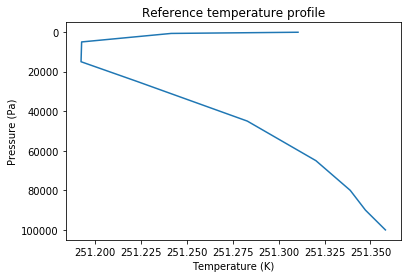

In [12]:
t,lev_mb=nmf3d.calcs.profile(files)
lev=lev_mb*100 # Pa
%matplotlib inline
import pylab as pl
pl.plot(t,lev)
pl.ylabel('Pressure (Pa)')
pl.xlabel('Temperature (K)')
pl.title('Reference temperature profile')
pl.gca().invert_yaxis()

In order to be used with other datasets, nmf3d.calcs.profile accepts as input arguments the names of the variables to load (lon, lat, pressure and temperature). The lon and lat can also be refined with splines using the option xmeth and ymeth. Ex.:

 - level 0 of 10
 - level 1 of 10
 - level 2 of 10
 - level 3 of 10
 - level 4 of 10
 - level 5 of 10
 - level 6 of 10
 - level 7 of 10
 - level 8 of 10
 - level 9 of 10


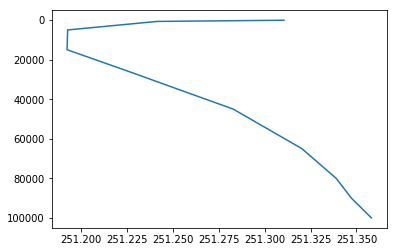

In [13]:
t,lev_mb=nmf3d.calcs.profile(files,xname='longitude',xmeth='spline')
lev=lev_mb*100
pl.plot(t,lev)
pl.gca().invert_yaxis()

Let's compare with a more realistic data (30 years of ERA Interim data with spatial resolution of 1.5, available in data folder):

Text(0.5,0,'Temperature (K)')

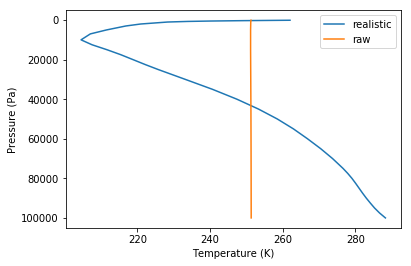

In [4]:
f=nmf3d.datafolder+'/T_ERA_I_1979_2010.txt'
import numpy as np
T,Lev=np.loadtxt(f)
pl.plot(T,Lev,label='realistic')
pl.plot(t,lev,label='raw')
pl.legend()
pl.gca().invert_yaxis()
pl.ylabel('Pressure (Pa)')
pl.xlabel('Temperature (K)')

### 2nd step: calculate the vertical structure equation

The vertical structure is calculated from a reference temperature profile (temperature and the corresponding pressure levels, obtained in 1st step)

saving out_vs_ws0False.nc
saving out_vs_ws0True.nc


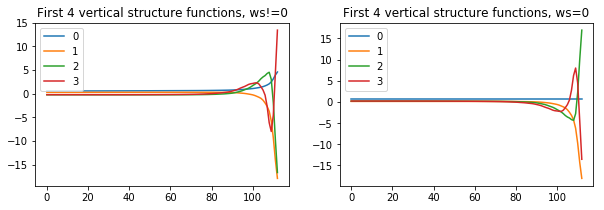

In [13]:
fig=pl.figure(figsize=(10,3))
ax=[pl.subplot(1,2,i) for i in range(1,3)]

Gn,hk,vfile=nmf3d.vertical_structure.vse(T,Lev,ws0=False)
ax[0].plot(Gn[:4].T);
ax[0].legend(range(4))
ax[0].set_title('First 4 vertical structure functions, ws!=0')

Gn,hk,vfile=nmf3d.vertical_structure.vse(T,Lev,ws0=True)
#Gn,hk,vfile=nmf3d.vertical_structure.vse(T,Lev) # returns the vertical structure functions
#                                                # and the equivalent heights
#print(hk.shape, Gn.shape, hk)
#pl.plot(hk,marker='.')
#print(vfile)
#print(Gn.shape,hk.shape,vfile)
#pl.figure()
ax[1].plot(Gn[:4].T);
ax[1].legend(range(4))
ax[1].set_title('First 4 vertical structure functions, ws=0')

ValueError: Error on input data

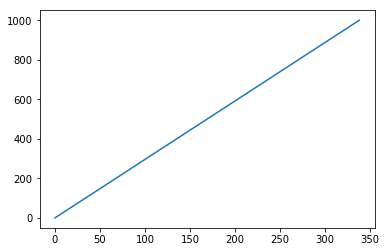

In [56]:
import netCDF4
plev=netCDF4.Dataset(vfile).variables['plev'][:]/100
#pl.semilogy(Gn[:4].T,plev)
#pl.semilogy(Gn[3].T,plev)
#pl.gca().invert_yaxis()

p=np.linspace(plev[-1],plev[0],plev.size*3)
pl.plot(p)

#v=np.interp(p,plev,Gn[3])
#pl.plot(v,p)

from scipy.interpolate import splrep,splev
#print(plev.shape,Gn[3].shape)
#print(plev)
#print(Gn[3])
#aux=splrep(np.arange(plev.size),Gn[3])

#pl.plot(plev)
#print(plev.dtype)
aux = splrep(plev,Gn[3])
v = splev(p, aux,der=0,ext=0)
pl.plot(v,p)
#''';

By default a netcdf file with vse output is created. The options regarding this output file creations are:

 - save, save output to a file, True
 - format, output file format: npz or netcdf (default)

There are other important options:
- ws0, pressure vertical velocity zero at surface, False by default
- n_leg, number of Legendre polynomials to use, len(data)+20 by default

Let us now check te contents of the output netcdf file and then test the ws0 option:

In [7]:
nmf3d.calcs.ncshow(vfile)
#nmf3d.calcs.ncshow('out_vs_nleg37_ws0False.nc')


# Contents of the NetCDF file
   out_vs_ws0True.nc

:: Global Attributes:
   date   2017-10-13 16:44:34.829093
   ws0    True                      
   n_leg  57                        

:: Dimensions:
   nk_max   37
   GL      113

:: Variables:
                                    long_name                             units      shape  
   Gn     | Vertical structure functions                               |         | (37, 113) |
   hk     | Equivalent heights                                         |         | (37,)     |
   gamma0 | Static stability in the sigma system                       |         | (113,)    |
   plev   | Pressure levels corresponding to the gaussian sigma levels |         | (113,)    |


In [12]:
print(Gn.shape)
Gn,hk,fname=nmf3d.vertical_structure.vse(T,Lev,ws0=True)
print(hk)
print(Gn.shape)


(37, 113)
saving out_vsf_ws0True.nc
--------------> 37
[             inf   6.41440549e+03   2.78902424e+03   1.30045988e+03
   6.73503983e+02   4.02637644e+02   2.60347760e+02   1.72641016e+02
   1.24818417e+02   9.08828920e+01   6.53845605e+01   4.90581868e+01
   3.79207543e+01   2.97765454e+01   2.35242344e+01   1.86113727e+01
   1.47376884e+01   1.17108805e+01   9.31077741e+00   7.52973386e+00
   6.13734717e+00   5.04756621e+00   4.20547521e+00   3.53577676e+00
   3.00131784e+00   2.54732811e+00   2.16539123e+00   1.84416686e+00
   1.57499005e+00   1.34774250e+00   1.15765567e+00   9.99025605e-01
   8.66841142e-01   7.55206264e-01   6.60981316e-01   5.82052736e-01
   5.14712787e-01]
(37, 113)


Note that if ws0 is True, the first hk is infinite, as expected

#### 2.1 plotting the vertical structure functions

(37,) (37, 113)


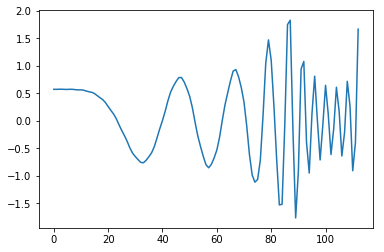

In [19]:
print(Lev.shape,Gn.shape)
pl.plot(Gn[-1])

### 3rd step: calculate the Hough vector functions

Hough vector functions as described in Swarztrauber and Kasahara (1985)

Part I: The frequencies and the Hough functions are computed for zonal wave number m = 0

Part II: The frequencies and the Hough functions are computed for zonal wave numbers m > 0

Inputs:
 - equivalent eights
 - M, maximum zonal wave number used in the expansion: m=0,1,...,M
 - nLR, total number of (west) Rossby modes used in the expansion (should be even)
 - nLG , half the number of Gravity modes used in the expansion (should be even)
 - latType, latitude type: linear (default, equally spaced) or gaussian
  
The total number of the Gravity modes will be 2*nLG=nLG(east gravity)+nLG(west gravity)

Other important inputs (kargs):
  - dlat, latitude spacing if latType is linear (default is 1.5, ie, 121 points) or number of gaussian lats if latType is gaussian (default is 128, corresponding to a spectral truncature of T85)
  - save, create file [True]
  - format, file format: [nc] or npz

In [ ]:
Gn,hk,fname=nmf3d.vertical_structure.vse(T,Lev,ws0=True)
nk=5 # number of function to keep
out=nmf3d.hough_functions.hvf(hk[:nk],M=6,nLR=8,nLG=6,dlat=6)
hfile_bB=out[-2:] # names of the two output files, will be needed later
print(hfile_bB)

#  ************ Important ************
# dlat was set to 6 because the output file will be used in the
# next step together with some ERA-Interim raw data where latitude
# spacing is 6deg.

Note that two files (baroclinic and barotropic) are saved since hk[0] is infinite (i.e., ws0 is True in the computation of the vertical structure). If not, both modes will be in the same file. Ex.:

In [ ]:
Gn,hk,vfile=nmf3d.vertical_structure.vse(T,Lev,ws0=False)
out=nmf3d.hough_functions.hvf(hk[:nk],M=6,nLR=8,nLG=6,dlat=6)
hfile=out[-1] # # names of the output file, will be needed later
print(hfile)

#  ************ Important ************
# dlat was set to 6 because the output file will be used in the
# next step together with some ERA-Interim raw data where latitude
# spacing is 6deg.

Let us take a look at the file contents:

In [ ]:
nmf3d.calcs.ncshow(hfile,Lmax=40)
# remove the Lmax option to see te entire variables' long_name

### 4th step:   Compute the 3-D spectrum of total energy E_nlk

i.e., te Vertical, Fourier and Hough transforms of zonal and meridional wind, and geopotential perturbation (from the reference geopotential)
  
Inputs:
 - vfile,  equivalent heights and vertical structure functions (output file from step 2)
 - hfile, Hough functions (output file from step 3)
 - data: u,v,geopotential data. This must be a dictionary with fields u, v and z. Each item is a dictionary with fields lon, lat, P (pressure levels) and v (the u, v or geopotential)
 
Other inputs (kargs):
 - save, create file [True]
 - format, file format: [nc] or npz

The module enlk includes example functions to load data from ERA-Interim. The functions can be easily converted to load data from other datasets. The loading of the data will now be explained using (low space/time resolution) ERA-Interim files present in foder data.

#### i) loading data

In [ ]:
import netCDF4
fu=nmf3d.datafolder+'/u_01_1979_.nc'
fv=nmf3d.datafolder+'/v_01_1979_.nc'
fz=nmf3d.datafolder+'/Z_01_1979_.nc'

data_u={}
data_v={}
data_z={}

# Let us start with u:
nc=netCDF4.Dataset(fu)
data_u['P']=nc.variables['lev'][:].astype('d')
data_u['lon']=nc.variables['lon'][:].astype('d')
data_u['lat']=nc.variables['lat'][:][::-1].astype('d') # reverse to have -90:90
data_u['v']=nc.variables['var131'][:][:,:,::-1,:].astype('d') # also reverse due to lat
nc.close()

# do the same thing with v (actually lon, lat and P are only needed inside data_u)
nc=netCDF4.Dataset(fv)
data_v['v']=nc.variables['var132'][:][:,:,::-1,:].astype('d') 
nc.close()

The geopotential is a bit more complex as the reference profile must be subtracted. The profile can be obtained following step 1. So let us do this first:

In [ ]:
files=nmf3d.datafolder+'/Z*'
Z,Zlev=nmf3d.calcs.profile(files,xname='lon',yname='lat',zname='lev')
pl.plot(Z,Zlev)
pl.gca().invert_yaxis()
Zref=Z.astype('d') # for later use

# now let's save this data for future use:
np.savetxt(nmf3d.datafolder+'/PHI_raw.txt',[Zref,Zlev])
# data folder also includes a realistic geopotential profile from ERA-Interim:
f=nmf3d.datafolder+'/PHI_ERA_I_1979_2010.txt'
Z_,z_=np.loadtxt(f)
pl.plot(Z_,z_,'.')

Now let us load the geopotential subtracting the reference. Note that some datasets provide not the geopotential but the geopotential height. In such case it must be divided by g.

In [ ]:
# Load geopotential:
nc=netCDF4.Dataset(fz)
z=nc.variables['var129'][:][:,:,::-1,:].astype('d')
nc.close()

# convert from geoptential height if needed:
# import const
# z/=const.g

# subtract the reference profile:
for i in range(z.shape[1]): z[:,i,:,:]-=Zref[i]

data_z['v']=z

Now we join all the data needed in a dictionary

In [ ]:
data=dict(u=data_u,v=data_v,z=data_z)

A similar code is in module enlk so that loading the data could be done simply as:

In [ ]:
data=nmf3d.enlk.load_ERA_I(fu,fv,fz,nmf3d.datafolder+'/PHI_raw.txt',height=False)

#### ii) E_nlk
##### 1. ws0 False

In [ ]:
vfile='out_vs_nleg57_ws0False.nc'
hfile='out_hvf_M6_nLR8_nLG12_NEH5_dlat6linear_ws0False.nc'
w_nlk,w_0lk,fsave=nmf3d.enlk.project(vfile,hfile,data)

An output file was created. Let's check it:

In [ ]:
nmf3d.calcs.ncshow(fsave)

##### 2. ws0 True
In this case, use input hfile as the baroclinic and barotropic hvf files

In [ ]:
vfile='out_vs_nleg57_ws0True.nc'
hfile=hfile_bB # out_hvf_M6_nLR8_nLG12_NEH5_dlat6linear_baroclinic.nc and
               # out_hvf_M6_nLR8_nLG12_NEH5_dlat6linear_barotropic.nc
w_nlk,w_0lk,fsave=nmf3d.enlk.project(vfile,hfile,data,label='out_ws0True')

#### iii) Making some plots....
 <div style='border: 3px solid red; color:red'>TODO !! </div>

In [ ]:
print(w_nlk.shape)